<a href="https://colab.research.google.com/github/hannah0wang/ml-stock-predictor/blob/main/predict_APPL_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program attempts to predict the future price of a stock

In [ ]:
#Import the libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [ ]:
#Collect and clean the data
df = pd.read_csv('stock_data.csv')
df = df.dropna()

#look at the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,12/31/2021,178.089996,179.229996,177.259995,177.570007,175.795349,64062300
1,1/3/2022,177.830002,182.880005,177.710007,182.009995,180.190948,104487900
2,1/4/2022,182.630005,182.940002,179.119995,179.699997,177.904037,99310400
3,1/5/2022,179.610001,180.169998,174.639999,174.919998,173.171829,94537600
4,1/6/2022,172.699997,175.300003,171.639999,172.000000,170.281021,96904000
...,...,...,...,...,...,...,...
246,12/22/2022,134.350006,134.559998,130.300003,132.229996,131.668243,77852100
247,12/23/2022,130.919998,132.419998,129.639999,131.860001,131.299820,63814900
248,12/27/2022,131.380005,131.410004,128.720001,130.029999,129.477585,69007800
249,12/28/2022,129.669998,131.029999,125.870003,126.040001,125.504539,85438400


(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 [Text(-50.0, 0, '10/19/2022'),
  Text(0.0, 0, '12/31/2021'),
  Text(50.0, 0, '3/15/2022'),
  Text(100.0, 0, '5/25/2022'),
  Text(150.0, 0, '8/8/2022'),
  Text(200.0, 0, '10/18/2022'),
  Text(250.0, 0, '12/29/2022'),
  Text(300.0, 0, '')])

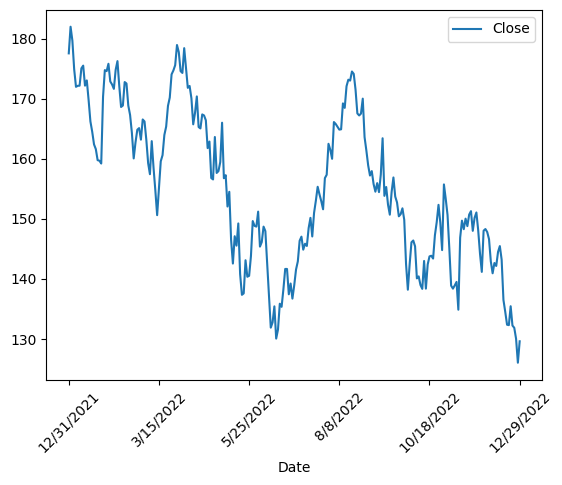

In [ ]:
# Show the data visually
df.plot(x="Date", y = "Close")
plt.xticks(rotation=45)

In [ ]:
# Create the model
model = RandomForestRegressor()

In [ ]:
# Train the model
X = df[['Open', 'High', 'Low', 'Volume']]
X = X[:int(len(df)-1)]
y = df['Close']
y = y[:int(len(df)-1)]
model.fit(X,y) #Training the model


RandomForestRegressor()

In [ ]:
# Test the model
predictions = model.predict(X)
print('The model score is:', model.score(X, y))

The model score is: 0.9975045260409476


In [ ]:
# Make the predictions
new_data = df[['Open', 'High', 'Low', 'Volume']].tail(1)
prediction = model.predict(new_data)
print('The model predicts the last row of data to be:', prediction)
print('The actual value is:', df[['Close']].tail(1).values[0][0])

The model predicts the last row of data to be: [128.5968997]
The actual value is: 129.610001
